# Multivariate Resemblance Analysis (MRA) 
remove highly-correlated variables we got from real dataset

In [3]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.utils import resample
print('Libraries imported!!')

Libraries imported!!


In [4]:
HOME_PATH = 'C:/Users/27261/Desktop/prostate/code-0126/' #home path of the project
file_path = HOME_PATH + 'Dataset_cedric/cedric_database2.xlsx'
raw_data = pd.read_excel(file_path)
raw_data = raw_data.drop(columns=["eadnr (I)"])
os.chdir(HOME_PATH)

In [6]:
from rdt.transformers.categorical import OrderedLabelEncoder
raw_data['cT(MRI)'] = raw_data['cT(MRI)'].astype(str)
encoder1 = OrderedLabelEncoder(order=['1c', '2a', '2b', '2c', '3a', '3b', '4']) # label as [0,1,2,3,4,5,6], no need to set ordered=True
tranformed_data_1 = encoder1.fit_transform(raw_data,"cT(MRI)")

encoder2 = OrderedLabelEncoder(order=[0,1,2,3])
tranformed_data_2 = encoder2.fit_transform(tranformed_data_1,"1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)")
order_cat = tranformed_data_2.copy()

# construct balanced dataset
from sklearn.utils import resample
majority_class = order_cat[order_cat["pN"] == 0]
minority_class = order_cat[order_cat["pN"] == 1]

minority_oversampled = resample(minority_class, 
                                replace=True,  
                                n_samples=len(majority_class),  
                                random_state=42)

balanced_df = pd.concat([majority_class, minority_oversampled])

# high-correlated variables
correlation_matrix = balanced_df.corr()
threshold = 0.85
high_corr_pairs = []  # save pairs of highly correlated variables

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  
            colname_i = correlation_matrix.columns[i]  # column i
            colname_j = correlation_matrix.columns[j]  # column j
            high_corr_pairs.append((colname_i, colname_j))

for pair in high_corr_pairs:
    print(f"High correlation between: {pair[0]} and {pair[1]}") # drop 10 columns

columns_to_drop = set()  #Using a set to avoid duplicates
# Iterate over the columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check for absolute correlation value
            colname = correlation_matrix.columns[i]  # Get the name of the column
            columns_to_drop.add(colname)

columns_to_drop


High correlation between: TargetBiopsie Primaire Gleason and Primaire Gleason
High correlation between: Target Biopsie Secundaire Gleason and Secundaire Gleason
High correlation between: Grade Group (longest) and Grade group (highest)
High correlation between: Percentage positieve cilinders and Aantal zones positive percentage
High correlation between: Percentage Cilinders meest voorkomende graad and Percentage Cilinders hoogste graad
High correlation between: Percentage Cilinders meest voorkomende graad and Percentage positieve cilinders
High correlation between: Grootste diameter (percentage of tumor) and Target biopsie Core length (perc)
High correlation between: Grade group Grootste mm aantasting and Grade group (highest)
High correlation between: Grade group Grootste mm aantasting and Grade Group (longest)


{'Grade Group (longest)',
 'Grade group Grootste mm aantasting',
 'Grootste diameter (percentage of tumor)',
 'Percentage Cilinders meest voorkomende graad',
 'Percentage positieve cilinders',
 'Target Biopsie Secundaire Gleason',
 'TargetBiopsie Primaire Gleason'}

In [20]:
os.getcwd()

'C:\\Users\\27261\\Desktop\\prostate\\code-0126'

## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [8]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV-FML','CTGAN','WGANGP']
SYNTHESIZERS = ['Real','GM','SDV-FML','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/Train.csv',
            'GM' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/GM.csv',
            'SDV-FML' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/SDV-FML.csv',
            'CTGAN' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/CTGAN.csv',
            'WGANGP' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_not_eanr/WGANGP.csv'}
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
data = dict()

In [26]:
new_folder_path = "Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated"
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

for name, path in FILEPATHS.items():
    
    df = pd.read_csv(path)
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
    
    # 构建新文件的完整路径
    file_name_with_extension = name + ".csv"
    new_file_path = os.path.join(new_folder_path, file_name_with_extension)
    
    # 保存处理后的文件
    df.to_csv(new_file_path, index=False)

print("Files have been processed and saved successfully.")

Files have been processed and saved successfully.


In [24]:
os.path.join(new_folder_path, name, ".csv")

'Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated\\WGANGP\\.csv'

In [28]:
#iterate over all datasets filepaths and read each dataset
NEW_FILEPATHS = {'Real' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated/Real.csv',
            'GM' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated/GM.csv',
            'SDV-FML' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated/SDV-FML.csv',
            'CTGAN' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated/CTGAN.csv',
            'WGANGP' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS_remove_high-correlated/WGANGP.csv'}

for name, path in NEW_FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':            Age Multifocaal 1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)  \
 0    60.254795           0                                                  3   
 1    66.391781           1                                                  3   
 2    69.010959           0                                                  1   
 3    41.136986           0                                                  3   
 4    74.665753           0                                                  1   
 ..         ...         ...                                                ...   
 228  68.350685           0                                                  1   
 229  73.531507           0                                                  1   
 230  65.734247           0                                                  1   
 231  60.189041           0                                                  1   
 232  69.282192           1                                                  2   
 
      

## 2. Plot PPC matrixes and calculate matrixes norms

In [29]:
#define directory of functions and actual directory
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from multivariate_resemblance import get_numerical_correlations
from multivariate_resemblance import plot_correlations
from multivariate_resemblance import get_categorical_correlations
from multivariate_resemblance import compute_mra_score

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


In [30]:
#compute correlation matrixes for all datasets
# to remove the numerical variable of "eanr(I)"
cors_numerical = dict()
norms_numerical = dict()
for name in DATA_TYPES :
    cors_numerical[name], norms_numerical[name] = get_numerical_correlations(data[name])   # no missing values but result is nan?
norms_numerical

{'Real': 8.5479,
 'GM': 8.1868,
 'SDV-FML': 6.9372,
 'CTGAN': 5.5238,
 'WGANGP': nan}

In [31]:
data['WGANGP'].isnull().sum()  # no missing values
data['WGANGP'].nunique() == 1   # constant value!   so it is the problem
# data['SDV-FML'].nunique() == 1  # all false

Age                                                                                 False
Multifocaal                                                                          True
1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)                                  False
Preoperatief PSA                                                                    False
Aantal zones positive percentage                                                    False
Primaire Gleason                                                                    False
Secundaire Gleason                                                                  False
Grade group (highest)                                                               False
Target biopsie Core length (perc)                                                   False
Target biopsie Core length (mm)                                                     False
Totaal Cilinders hoogste Graad                                                      False
Percentage

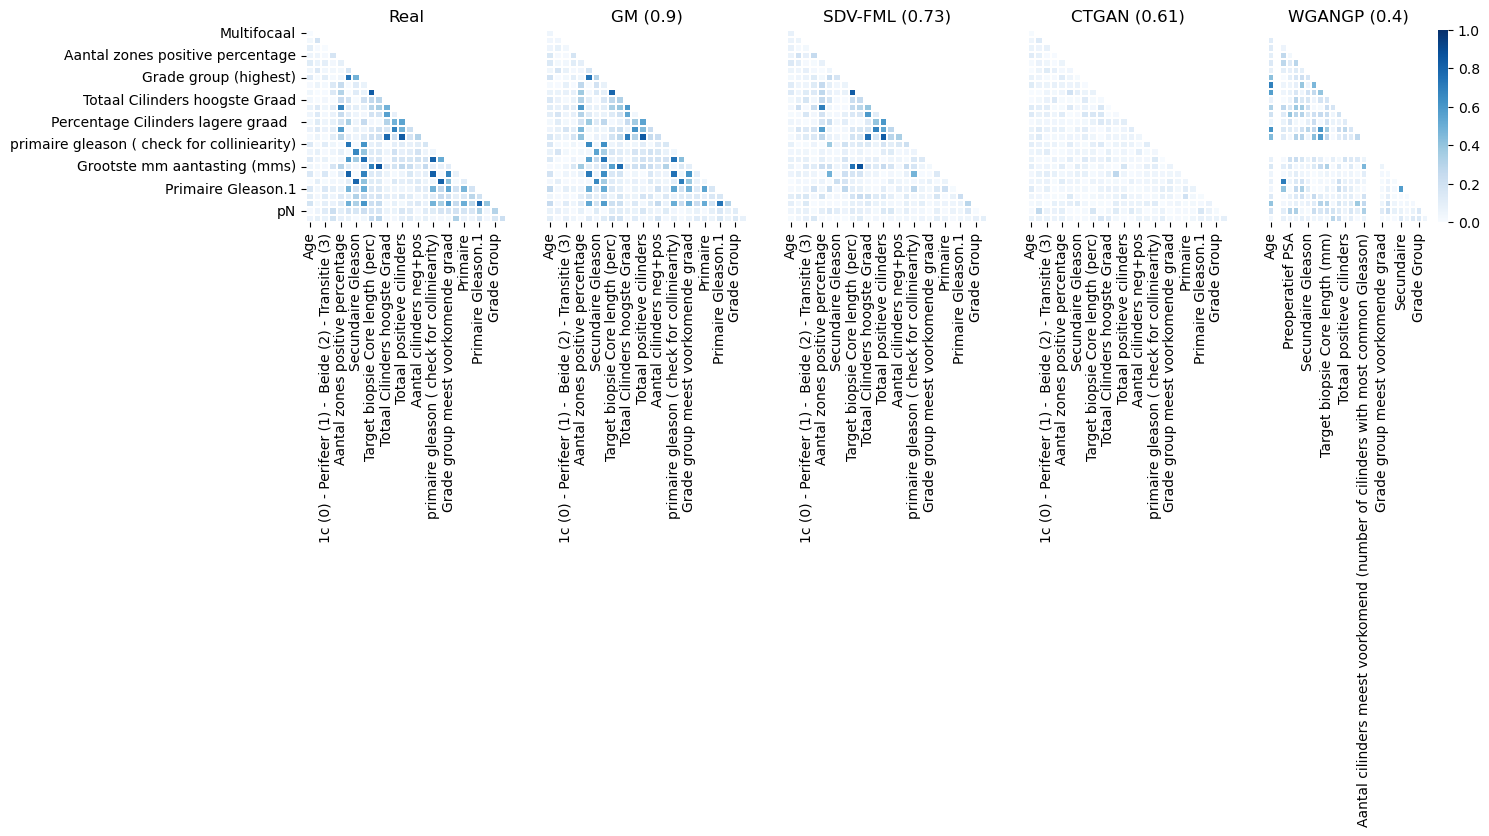

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))  # Pearson correlation matrices 
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_numerical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    
    
    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_numerical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
    
# fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/PPC_Matrices.svg', bbox_inches='tight')

## 3. Plot correlations for categorical variables and calculate matrixes norms

In [33]:
#compute correlation matrixes for all datasets
cors_categorical = dict()
norms_categorical = dict()
for name in DATA_TYPES :
    cors_categorical[name], norms_categorical[name] = get_categorical_correlations(data[name])
norms_categorical

{'Real': 1.5309,
 'GM': 1.4497,
 'SDV-FML': 1.6303,
 'CTGAN': 1.9569,
 'WGANGP': 2.1076}

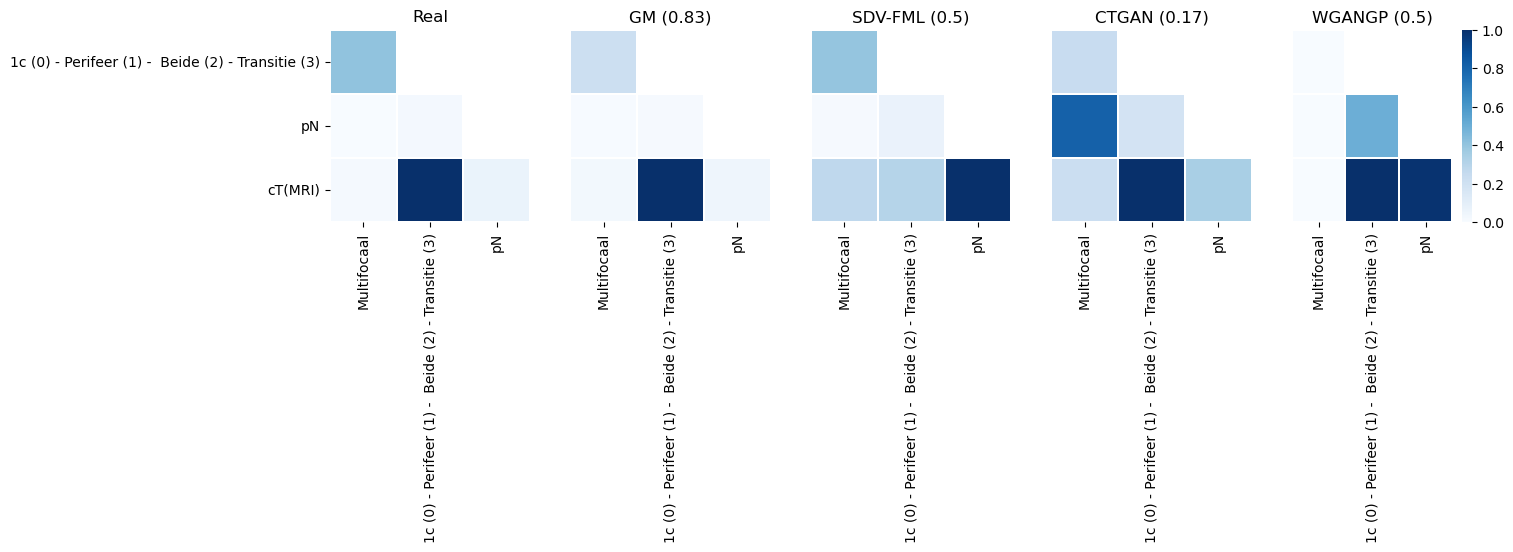

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 2.5))
axs_idxs = range(6)
idx = dict(zip(DATA_TYPES,axs_idxs))
first = True

for name_idx, name in enumerate(DATA_TYPES) :
    ax = axs[idx[name]]
    matrix = cors_categorical[name]
    
    if name_idx != len(DATA_TYPES) - 1:
        plot_correlations(matrix, ax, color_bar=False)
    else:
        plot_correlations(matrix, ax, color_bar=True)
    
    if name_idx > 0:
        ax.set_yticks([])    

    if name == 'Real' :
        ax.set_title(name)
    else :
        score = compute_mra_score(cors_categorical['Real'], matrix)
        ax.set_title(name + ' (' + str(score) + ')')
        
# fig.savefig('MULTIVARIATE RESEMBLANCE RESULTS/Categorical_Matrices.svg', bbox_inches='tight')

## 4. Explore the results

In [35]:
norms_numerical

{'Real': 8.5479,
 'GM': 8.1868,
 'SDV-FML': 6.9372,
 'CTGAN': 5.5238,
 'WGANGP': nan}

In [36]:
norms_categorical

{'Real': 1.5309,
 'GM': 1.4497,
 'SDV-FML': 1.6303,
 'CTGAN': 1.9569,
 'WGANGP': 2.1076}

In [37]:
norms_data = [np.asarray(list(norms_numerical.values())), np.asarray(list(norms_categorical.values()))]
df_norms = pd.DataFrame(data=norms_data, columns=DATA_TYPES, index=['PPC_MATRIX_NORMS','CATEGORICAL_CORS_MATRIX_NORMS'])
df_norms.to_excel('C:/Users/27261/Desktop/Results/multi_cor_remove.xlsx')
df_norms

,Real,GM,SDV-FML,CTGAN,WGANGP
PPC_MATRIX_NORMS,8.5479,8.1868,6.9372,5.5238,NaN
CATEGORICAL_CORS_MATRIX_NORMS,1.5309,1.4497,1.6303,1.9569,2.1076
